In [1]:
import datetime

import numpy as np
import pandas as pd

from scipy.io import mmread

import matplotlib.pyplot as plt

In [2]:
import os
os.__file__

'/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/os.py'

# load data

## expression data

In [3]:
exp_data=mmread('data/koh_extract/koh.data.counts.mm').toarray().astype(float)
with open('data/koh_extract/koh.data.col','r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
with open('data/koh_extract/koh.data.row','r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
assert exp_data.shape==(len(exp_data_row),len(exp_data_col))

In [4]:
assert len(set(exp_data_row))==len(exp_data_row)
assert len(set(exp_data_col))==len(exp_data_col)

In [5]:
exp_data,exp_data.shape

(array([[1.93134327e+04, 5.81785206e+04, 9.08678570e+03, ...,
         7.58501657e+04, 8.94289538e+04, 1.01937411e+05],
        [2.48547207e+04, 4.67361235e+04, 1.09620933e+04, ...,
         1.85699498e+04, 1.85806217e+04, 2.49668288e+04],
        [1.18570138e+04, 2.80836990e+04, 6.80287185e+03, ...,
         3.53701816e+04, 5.75775170e+04, 5.59807979e+04],
        ...,
        [4.83851544e+01, 1.19916350e+01, 6.96361343e+00, ...,
         4.88990717e+00, 8.49751588e+00, 7.80405857e+01],
        [2.35818377e+01, 4.26839000e+01, 1.80639917e+01, ...,
         7.54470439e+00, 2.84437127e+00, 8.88332407e+00],
        [6.10992450e+01, 2.59814157e+01, 2.45930809e+01, ...,
         4.85579286e-01, 0.00000000e+00, 0.00000000e+00]]), (4898, 446))

In [6]:
exp_data_row[:5],exp_data_col[:5]

(['ENSG00000198804',
  'ENSG00000210082',
  'ENSG00000198712',
  'ENSG00000198938',
  'ENSG00000198727'],
 ['SRR3952323', 'SRR3952325', 'SRR3952326', 'SRR3952327', 'SRR3952328'])

## cluster info 

In [7]:
exp_data_meta=pd.read_csv('data/koh_extract/koh.metadata.tsv',sep='\t')
exp_data_meta.head()

,Run,LibraryName,phenoid,libsize.drop,feature.drop,total_features,log10_total_features,total_counts,log10_total_counts,pct_counts_top_50_features,pct_counts_top_100_features,pct_counts_top_200_features,pct_counts_top_500_features,is_cell_control,celltype,tSNE_1,tSNE_2
SRR3952323,SRR3952323,H7hESC,H7hESC,False,False,4895,3.689841,2.248411e+06,6.351876,18.278965,25.975390,35.537616,52.410941,False,hESC,9.973465,19.045918
SRR3952325,SRR3952325,H7hESC,H7hESC,False,False,4887,3.689131,2.271617e+06,6.356335,24.672529,32.222803,41.547358,57.969233,False,hESC,10.366232,21.511833
SRR3952326,SRR3952326,H7hESC,H7hESC,False,False,4888,3.689220,5.846824e+05,5.766921,22.732839,30.205988,39.431308,55.285817,False,hESC,9.881356,19.317197
SRR3952327,SRR3952327,H7hESC,H7hESC,False,False,4879,3.688420,3.191810e+06,6.504037,20.867378,29.003904,38.785558,56.020859,False,hESC,8.483966,21.289459
SRR3952328,SRR3952328,H7hESC,H7hESC,False,False,4873,3.687886,2.190385e+06,6.340521,21.287923,29.423689,39.307683,56.640975,False,hESC,9.017168,20.637262


`clusterid_to_clustername` is used to convert integers in `res.0.8` to cell-type name

# Panglao

In [8]:
markers_db=pd.read_csv("data/PanglaoDB_markers_27_Mar_2020.tsv.gz",sep='\t')
markers_db=markers_db[markers_db['species'].str.contains('Hs')].drop(columns='species')
markers_db.head()

,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,RBPJL,Acinar cells,RBP-L|SUHL|RBPSUHL,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,PTF1A,Acinar cells,PTF1-p48|bHLHa29,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
5,CELA3A,Acinar cells,ELA3|ELA3A,0.001,chymotrypsin like elastase family member 3A,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.128571,0.000000,0.000000


In [9]:
#markers_db[(markers_db['official gene symbol']=='FXDY2') |(markers_db['nicknames'].str.contains('FXDY2'))],'FXDY2' in exp_data_row

## Marker info

In [10]:
clustername_to_markers=pd.read_csv('data/koh_extract/koh.rho.tsv',sep='\t').T

In [11]:
clustername_to_markers

,ENSG00000008311,ENSG00000018625,ENSG00000019549,ENSG00000026025,ENSG00000039068,ENSG00000042493,ENSG00000053438,ENSG00000075340,ENSG00000079102,ENSG00000092068,...,ENSG00000240563,ENSG00000241186,ENSG00000243004,ENSG00000249532,ENSG00000250305,ENSG00000254277,ENSG00000254339,ENSG00000260342,ENSG00000260834,ENSG00000280623
hESC,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,0,1,1,1,1,0
APS,0,0,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,0
MPS,0,0,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DLL1pPXM,0,1,1,1,1,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0
ESMT,0,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,1,1,0
Sclrtm,0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
D5CntrlDrmmtm,0,1,1,1,0,1,0,1,1,1,...,0,0,0,0,1,0,0,1,1,0
D2LtM,0,1,1,1,1,1,0,1,1,1,...,0,0,1,0,1,0,0,1,1,0


In [12]:
len(clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1]==1].index.intersection(
    clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,0][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,0]==1].index
)),len(clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1]==1].index)

(27, 50)

In [13]:
clustername_unique=list(clustername_to_markers.index)
exp_data_meta_clusterid_clusteridunique=exp_data_meta['celltype'].apply(lambda x: clustername_unique.index(x))

In [14]:
marker_unique=list(clustername_to_markers.columns)
marker_unique_exp_data_idx=[exp_data_row.index(marker) for marker in marker_unique]

In [15]:
pi_true=np.array([np.sum(exp_data_meta_clusterid_clusteridunique==i) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])/exp_data_meta_clusterid_clusteridunique.shape[0]
M_true=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,exp_data_meta_clusterid_clusteridunique==i],axis=1) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])

In [16]:
cell_size_factor=pd.read_csv('data/analysis/koh.size_factor_cluster.tsv',sep='\t',header=None)[0].values.astype(float)#.reshape(-1,1)
#cell_size_factor=np.ones_like(cell_size_factor)
cell_size_factor.shape

(446,)

In [17]:
Y=exp_data[marker_unique_exp_data_idx].transpose().astype(float)
Y.shape

(446, 84)

In [18]:
#marker_onehot=np.array([np.sum(np.eye(len(marker_unique))[[marker_unique.tolist().index(marker) for marker in value]],axis=0) for key,value in clustername_to_markers.items()])
#marker_onehot.shape
#marker_onehot.T
marker_onehot=clustername_to_markers

In [19]:
#exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int).values
#x_data_covariate=np.eye(len(np.unique(exp_data_col_patient)))[exp_data_col_patient-1]
x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept],axis=1)
x_data_null.shape

(446, 1)

In [20]:
# Asuume that the following variables are initialized

# Input
Y
s=cell_size_factor
#X=x_data_null.copy()[:,[0, 1,2,3,4]]
#X=x_data_null.copy()[:,[0, 1,2]]
#X=x_data_null.copy()[:,[0,1,2,3]]
X=x_data_null.copy()#[:,[0,1,2]]
# 234 x
# 34 x
# 123 x
rho=marker_onehot

delta_min=2
B=10
LR=1e-1

# Optional
EM_ITER_MAX=20
M_ITER_MAX=10000

BATCH_SIZE=Y.shape[0]
NUM_WORKERS=0

LOWER_BOUND=1e-10
THETA_LOWER_BOUND=1e-20


Q_diff_tolerance=1e-4
LL_diff_tolerance=1e-4
X.shape

(446, 1)

In [21]:
import math
import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.nn.parameter import Parameter

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [22]:
torch.set_default_dtype(torch.float64) 

In [23]:
device_cpu=torch.device("cpu")
device_cuda_list=[torch.device("cuda:{}".format(i)) for i in range(6)][::-1]

In [24]:
#from basic_tools import Cell_Dataset,Masked
class Masked_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, mask):
        #print('aaaa')
        output=input
        ctx.save_for_backward(input, mask)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        input, mask = ctx.saved_tensors
        grad_input = grad_mask = None
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mul(mask)

        return grad_input, grad_mask
    
class Masked(nn.Module):    
    def __init__(self, mask):    
        super(Masked, self).__init__()
        
        self.mask = nn.Parameter(torch.Tensor(mask)==1, requires_grad=False)    
        
        
    def forward(self, input):
        return Masked_Function.apply(input, self.mask)

    def extra_repr(self):
        return 'mask={}'.format(self.mask.shape)  

In [25]:
import math
class NB_logprob(nn.Module):
    def __init__(self):
        super(NB_logprob,self).__init__()
        
    def forward(self,total_count,probs,value):
        
        #eps = torch.finfo(probs.dtype).eps
        #probs_clamped=probs.clamp(min=eps, max=1 - eps)        
        probs_clamped=probs
        logits=torch.log(probs_clamped) - torch.log1p(-probs_clamped)
        #logits=torch.log(probs_clamped)
        
        log_unnormalized_prob = (total_count * F.logsigmoid(-logits) +
                                 value * F.logsigmoid(logits))
        log_normalization = (-torch.lgamma(total_count + value) + torch.lgamma(1. + value) +
                             torch.lgamma(total_count))

        return log_unnormalized_prob - log_normalization
    
class Normal_logprob(nn.Module):
    def __init__(self):
        super(Normal_logprob,self).__init__()
        
    def forward(self,loc,scale,value):
    
        var = (scale ** 2)
        log_scale = torch.log(scale)
        
        
        #print(loc.shape,scale.shape,value.shape)
        return -((value - loc) ** 2) / (2 * var) - log_scale - math.log(math.sqrt(2 * math.pi))    
        #return log_scale
        
class Poisson_logprob(nn.Module):
    def __init__(self):
        super(Poisson_logprob,self).__init__()
        
    def forward(self,rate,value):
        #rate=rate.clamp(min=1e-3)+(-1)/rate.clamp(max=-1e-5)
        
        return (rate.log() * value) - rate - (value + 1).lgamma()
    
class Dirichlet_logprob(nn.Module):
    def __init__(self):
        super(Dirichlet_logprob,self).__init__()
        
    def forward(self,concentration,value):
        
        return ((torch.log(value) * (concentration - 1.0)).sum(-1) +
                torch.lgamma(concentration.sum(-1)) -
                torch.lgamma(concentration).sum(-1))
    
        
NB_logprob=NB_logprob()        
normal_logprob=Normal_logprob()
poisson_logprob=Poisson_logprob()
dirichlet_logprob=Dirichlet_logprob()

In [26]:
class Cell_Dataset(Dataset):
    def __init__(self,Y,X,s):
        self.Y=Y
        self.X=X
        self.s=s
        
    def __len__(self):
        return self.Y.shape[0]
    
    def __getitem__(self,idx):
        item= {"Y":self.Y[idx,:],"X":self.X[idx,:],"s":self.s[idx]}
        return item  

In [27]:
def run_EM(model,optimizer):
    global gamma_new,Q_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)
        gamma_new=Poisson_Function_Nomask.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,'gamma')
        gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
        _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')

    print(LL_old)
    print(Q_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #E-step
            ######### ####
            with torch.no_grad():
                gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<Q_diff_tolerance:
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                _,_,LL_temp=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    return gamma_new,Q_new,LL_new

In [28]:
def run_EM_trick(model,optimizer,LL_diff_tolerance,Q_diff_tolerance,verbose=True):
    global gamma_new,LL_new
    
    if verbose:
        print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        LL_old=model(batch_Y,batch_X,batch_s)
        Q_old=LL_old
    if verbose:
        print(LL_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                Q_new=-model(batch_Y,batch_X,batch_s)
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    if verbose:
                        print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<(Q_diff_tolerance):
                        if verbose:
                            print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                LL_temp=-Q_new
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        if verbose:
            print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            if verbose:
                print('EM break')
            break
    if verbose:
        print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    
    with torch.no_grad():
        gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
    return gamma_new,Q_new,LL_new

In [29]:
def run_quasi_trick(model,optimizer,LL_diff_tolerance,Q_diff_tolerance,verbose=True):
    global gamma_new,LL_new
    
    if verbose:
        print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        LL_old=model(batch_Y,batch_X,batch_s)
        Q_old=LL_old
    if verbose:
        print(LL_old)
        
        
    def closure():
        global Q_new
        optimizer.zero_grad()
        Q_new = -model(batch_Y,batch_X,batch_s)
        Q_new.backward()
        print(Q_new)
        return Q_new
    

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                optimizer.step(closure)
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    if verbose:
                        print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<(Q_diff_tolerance):
                        if verbose:
                            print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                LL_temp=-Q_new
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        if verbose:
            print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            if verbose:
                print('EM break')
            break
    if verbose:
        print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    
    with torch.no_grad():
        gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
    return gamma_new,Q_new,LL_new



"""
def run_quasi_trick(model,optimizer):
    global gamma_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        LL_old=model(batch_Y,batch_X,batch_s)
        Q_old=LL_old
    print(LL_old)


    
    
    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #M-step
            #############
            
            
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
         
                optimizer.step(closure)
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)
                
                #with torch.no_grad():
                #    Q=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'LL')
                #    gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
                #print(Q,gamma_new[:3])                   


                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<(Q_diff_tolerance):
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                LL_temp=-Q_new
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    
    with torch.no_grad():
        gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
    return gamma_new,Q_new,LL_new

"""

"\ndef run_quasi_trick(model,optimizer):\n    global gamma_new,LL_new\n    \n    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))\n    \n    with torch.no_grad():\n        for batch_idx,batch in enumerate(cell_dataloader):\n            batch_Y=batch['Y'].to(device)\n            batch_X=batch['X'].to(device)\n            batch_s=batch['s'].to(device)    \n        LL_old=model(batch_Y,batch_X,batch_s)\n        Q_old=LL_old\n    print(LL_old)\n\n\n    \n    \n    for em_idx in range(EM_ITER_MAX):#\n        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))\n        LL_new=torch.zeros_like(LL_old)\n        #optimizer = optim.Adam(model.parameters(),lr=LR)\n        for batch_idx,batch in enumerate(cell_dataloader):\n            # It is usually just one iteration(batch).\n            # However, developer of cellAssign may have done this for extreme situation of larse sample size\n            batch_Y=batch['Y'].to(device)\n            batch

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet

class Custom_Model(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        

        # lower bounds
        self.LOWER_BOUND=LOWER_BOUND
        self.THETA_LOWER_BOUND=THETA_LOWER_BOUND
        
    def forward(self,Y,X,s,gamma_fixed=None,mode='E'):
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        delta=torch.exp(delta_log_masked)*self.masked.mask
        
        X_beta_s=X.matmul(self.beta)+torch.log(s.view(-1, 1)) #(N,P)*(P,G) + (N,1) = (N,G)
        
        mu_log=X_beta_s.unsqueeze(dim=1).repeat(1,delta.shape[0],1)+delta #(N,1,G)+(C,G) = (N,C,G)
        
        mu=torch.exp(mu_log) # (N,C,G)
        
        #Y_extend=Y.view(Y.shape[0],1,Y.shape[1]).repeat(1,mu_log.shape[1],1) # (N,C,G)
        Y_extend=Y.unsqueeze(dim=1).repeat(1,mu_log.shape[1],1)
        
        # Poisson
        Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)

        Y_logprob_reduce=torch.sum(Y_logprob,axis=2)
        
        Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1) # (N,1)
        
        gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce) # (N,C)

        if mode=='E':
            return gamma,None,None
        elif mode=='M' or mode=='LL':
            if mode=='M':
                Q=-torch.sum(gamma_fixed*Y_logprob_reduce) # (N,C) (N,C)
                return gamma,Q,None
            elif mode=='LL':      
                LL=torch.sum(Y_logprob_reduce_reduce) # product of likelihood(y_i)-> (1) 
                return gamma,None,LL
        else:
            raise          

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet

class Custom_Model(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        
    def forward(self,Y,X,s,gamma_fixed=None,mode='E'):
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        delta=torch.exp(delta_log_masked)*self.masked.mask
        
        X_beta_s=X.matmul(self.beta)+torch.log(s.view(-1, 1)) #(N,P)*(P,G) + (N,1) = (N,G)
        
        mu_log=X_beta_s.unsqueeze(dim=1).repeat(1,delta.shape[0],1)+delta #(N,1,G)+(C,G) = (N,C,G)
        
        mu=torch.exp(mu_log) # (N,C,G)
        
        #Y_extend=Y.view(Y.shape[0],1,Y.shape[1]).repeat(1,mu_log.shape[1],1) # (N,C,G)
        Y_extend=Y.unsqueeze(dim=1).repeat(1,mu_log.shape[1],1)
        
        # Poisson
        Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)

        Y_logprob_reduce=torch.sum(Y_logprob,axis=2)
        
        Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1) # (N,1)
        
        gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce) # (N,C)

        if mode=='E':
            return gamma,None,None
        elif mode=='M' or mode=='LL':
            if mode=='M':
                Q=-torch.sum(gamma_fixed*Y_logprob_reduce) # (N,C) (N,C)
                return gamma,Q,None
            elif mode=='LL':      
                LL=torch.sum(Y_logprob_reduce_reduce) # product of likelihood(y_i)-> (1) 
                return gamma,None,LL
        else:
            raise          

In [32]:
   
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet


class Poisson_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, Y, X, s, delta_log, beta, mask,to_return='LL'):

        with torch.no_grad():
            #mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log)*mask)
            Y_extend=Y.unsqueeze(dim=1).repeat(1,mu.shape[1],1)
            Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
            Y_logprob_reduce=Y_logprob.sum(axis=2)
            
            Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1)
            
            LL=torch.sum(Y_logprob_reduce_reduce)
            
            gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce)
            A=mu-Y.unsqueeze(dim=1)        
            
            #gradient
            grad_delta_log=(A*gamma.unsqueeze(dim=2)).sum(axis=0)
            grad_beta=(X.unsqueeze(dim=2)@gamma.unsqueeze(dim=1)@A).sum(axis=0)
        
            ctx.save_for_backward(grad_delta_log,grad_beta)
            
        if to_return=='LL':
            return LL
        else:
            return gamma
            

    @staticmethod
    def backward(ctx, grad_output):
        
        grad_Y = grad_X = grad_s = grad_delta_log = grad_beta = grad_mask=None
        grad_delta_log,grad_beta = ctx.saved_tensors

        return grad_Y, grad_X, grad_s, grad_delta_log, grad_beta, grad_mask

class Poisson_Function_Nomask(torch.autograd.Function):
    @staticmethod
    def forward(ctx, Y, X, s, delta_log, beta, to_return='LL'):

        with torch.no_grad():
            #mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            Y_extend=Y.unsqueeze(dim=1).repeat(1,mu.shape[1],1)
            Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
            Y_logprob_reduce=Y_logprob.sum(axis=2)
            
            Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1)
            
            LL=torch.sum(Y_logprob_reduce_reduce)
            
            gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce)
            A=mu-Y.unsqueeze(dim=1)        
            
            #gradient
            grad_delta_log=(A*gamma.unsqueeze(dim=2)).sum(axis=0)
            grad_beta=(X.unsqueeze(dim=2)@gamma.unsqueeze(dim=1)@A).sum(axis=0)
        
            ctx.save_for_backward(grad_delta_log,grad_beta)
            
        if to_return=='LL':
            return LL
        else:
            return gamma
            

    @staticmethod
    def backward(ctx, grad_output):
        
        grad_Y = grad_X = grad_s = grad_delta_log = grad_beta = None
        grad_delta_log,grad_beta = ctx.saved_tensors

        return grad_Y, grad_X, grad_s, grad_delta_log, grad_beta

In [33]:
    
class Custom_Model_Trick_Hard(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model_Trick_Hard, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/(np.std(Y_colmean) if len(Y_colmean)>1 else 1)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        
    def init_parameter(self,rho=None,Y=None,delta_min=None):
        if delta_min is not None:
            self.delta_log_min=np.log(delta_min) #
            self.delta_log.data[:]=torch.Tensor(np.random.uniform(-2,2,size=self.delta_log.data.shape))
            self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)

        if rho is not None:
            self.masked.mask.data=(rho==1)
        
        if Y is not None:
            Y_colmean=np.mean(Y,axis=0)
            beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/(np.std(Y_colmean) if len(Y_colmean)>1 else 1)).reshape(-1,1),\
                         np.zeros((Y.shape[1],self.beta.shape[0]-1))]).T      
            self.beta.data[:]=torch.Tensor(beta_init)
        
    def forward(self,Y,X,s):
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        #delta=torch.exp(delta_log_masked)*self.masked.mask
        
        LL=Poisson_Function.apply(Y,X,s,delta_log_masked,self.beta,self.masked.mask)

        return LL  

In [34]:
    
class Custom_Model_Trick_Hard_Nomask(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model_Trick_Hard_Nomask, self).__init__()
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        
    def init_parameter(self,Y=None,delta_min=None):
        if delta_min is not None:
            self.delta_log_min=np.log(delta_min) #
            self.delta_log.data[:]=torch.Tensor(np.random.uniform(-2,2,size=self.delta_log.data.shape))
            self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
        
        if Y is not None:
            Y_colmean=np.mean(Y,axis=0)
            beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                         np.zeros((Y.shape[1],self.beta.shape[0]-1))]).T        
            self.beta.data[:]=torch.Tensor(beta_init)
        
    def forward(self,Y,X,s):
        
        LL=Poisson_Function_Nomask.apply(Y,X,s,self.delta_log,self.beta)

        return LL     

In [35]:
class Custom_Model_Trick(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model_Trick, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/(np.std(Y_colmean) if len(Y_colmean)>1 else 1)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        
    def init_parameter(self,rho=None,Y=None,delta_min=None):
        if delta_min is not None:
            self.delta_log_min=np.log(delta_min) #
            self.delta_log.data[:]=torch.Tensor(np.random.uniform(-2,2,size=self.delta_log.data.shape))
            self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)

        if rho is not None:
            self.masked.mask.data=(rho==1)
        
        if Y is not None:
            Y_colmean=np.mean(Y,axis=0)
            beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/(np.std(Y_colmean) if len(Y_colmean)>1 else 1)).reshape(-1,1),\
                         np.zeros((Y.shape[1],self.beta.shape[0]-1))]).T      
            self.beta.data[:]=torch.Tensor(beta_init)
        
    def forward(self,Y,X,s):
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        #delta=torch.exp(delta_log_masked)*self.masked.mask
        
        mu=torch.exp((X.matmul(self.beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,self.delta_log.shape[0],1)+torch.exp(delta_log_masked)*self.masked.mask)
        Y_extend=Y.unsqueeze(dim=1).repeat(1,mu.shape[1],1)
        Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
        Y_logprob_reduce=Y_logprob.sum(axis=2) # (N,C)

        Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1) # (N,1)

        #gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce) # (N,C)
        
        LL=torch.sum(Y_logprob_reduce_reduce) # (N,C)
        
        return LL      
    

In [47]:
np.sum(np.array(result1_1)/np.array(result1_10)>40)

NameError: name 'result1_1' is not defined

In [95]:
device=device_cuda_list[3]#

model=Custom_Model(Y,np.ones_like(rho.values).repeat(2,axis=0),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))


cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [76]:
device=device_cuda_list[3]#

model=Custom_Model_Trick(Y,np.ones_like(rho.values).repeat(2,axis=0),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))


cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


(446, 8)

In [368]:
LL_all.index[(LL_all[1]/LL_all[3])>10].intersection(marker_unique_exp_data_idx)
len(marker_unique_exp_data_idx)
rho.shape

(8, 84)

In [377]:
#record_dict

In [657]:
device=device_cuda_list[3]#



model=Custom_Model_Trick(Y,np.ones((20,Y.shape[1])),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adamax(model.parameters(),lr=LR)#,betas=(0.92, 0.999))


cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [658]:
record_dict_all={}

In [733]:
value=13

Y=exp_data[(LL_all[1]/LL_all[3])>value].transpose().astype(float)
print(Y.shape)
print(len(LL_all.index[(LL_all[1]/LL_all[3])>value].intersection(marker_unique_exp_data_idx)))

(446, 1)
1


In [729]:
Y=exp_data[3834:3834+1].transpose().astype(float)
Y.shape

(446, 1)

In [734]:
model=Custom_Model_Trick(Y,np.ones((20,Y.shape[1])),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adamax(model.parameters(),lr=LR)#,betas=(0.92, 0.999))


cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)


LL=run_EM_trick(model,optimizer,LL_diff_tolerance=1e-3*LL_diff_tolerance,Q_diff_tolerance=1e-3*Q_diff_tolerance,verbose=True)[1].detach().cpu().numpy()

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


Start time: 2020-05-21 13:58:07
tensor(-16410.0419, device='cuda:2')
M: 0, Q: 16410.0418701377 Q_diff: -2.0
M: 20, Q: 2314.1099652032917 Q_diff: 0.8589820803922255
M: 40, Q: 1685.9527460219224 Q_diff: 0.27144657281927675
M: 60, Q: 1502.81105942727 Q_diff: 0.10862800693956755
M: 80, Q: 1463.0099922301415 Q_diff: 0.026484411960806933
M: 100, Q: 1456.7911310222614 Q_diff: 0.004250730508272436
M: 120, Q: 1455.6848289054926 Q_diff: 0.000759410249836218
M: 140, Q: 1455.6169410923094 Q_diff: 4.663634039126263e-05
M: 160, Q: 1455.5959251912698 Q_diff: 1.4437796405315065e-05
M: 180, Q: 1455.5908204442412 Q_diff: 3.5069808455826248e-06
M: 200, Q: 1455.589552260787 Q_diff: 8.712499669179617e-07
M: 220, Q: 1455.5890809098769 Q_diff: 3.2382130624853336e-07
M: 240, Q: 1455.5888549257925 Q_diff: 1.552526653110996e-07
M: 260, Q: 1455.5887312508798 Q_diff: 8.496555343268108e-08
M break
EM: 0, LL: -1455.5887312508798 LL_diff: 0.9112989020521819
M: 0, Q: 1455.5887266532263 Q_diff: 3.158621261681419e-09
M

In [681]:
with torch.no_grad():
    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)    
    gamma_get=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma').cpu().numpy()
    
    

record_dict={}
record_dict['Y.shape']=Y.shape
record_dict['Y.shape.intersection']=len(LL_all.index[(LL_all[1]/LL_all[3])>value].intersection(marker_unique_exp_data_idx))
record_dict['LL']=-Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'LL').detach().cpu().numpy()
record_dict['gamma']=gamma_get
record_dict['model.delta_log']=model.delta_log.detach().cpu().numpy()
record_dict['model.beta']=model.beta.detach().cpu().numpy()

record_dict_all[value]=record_dict

In [682]:
value

8

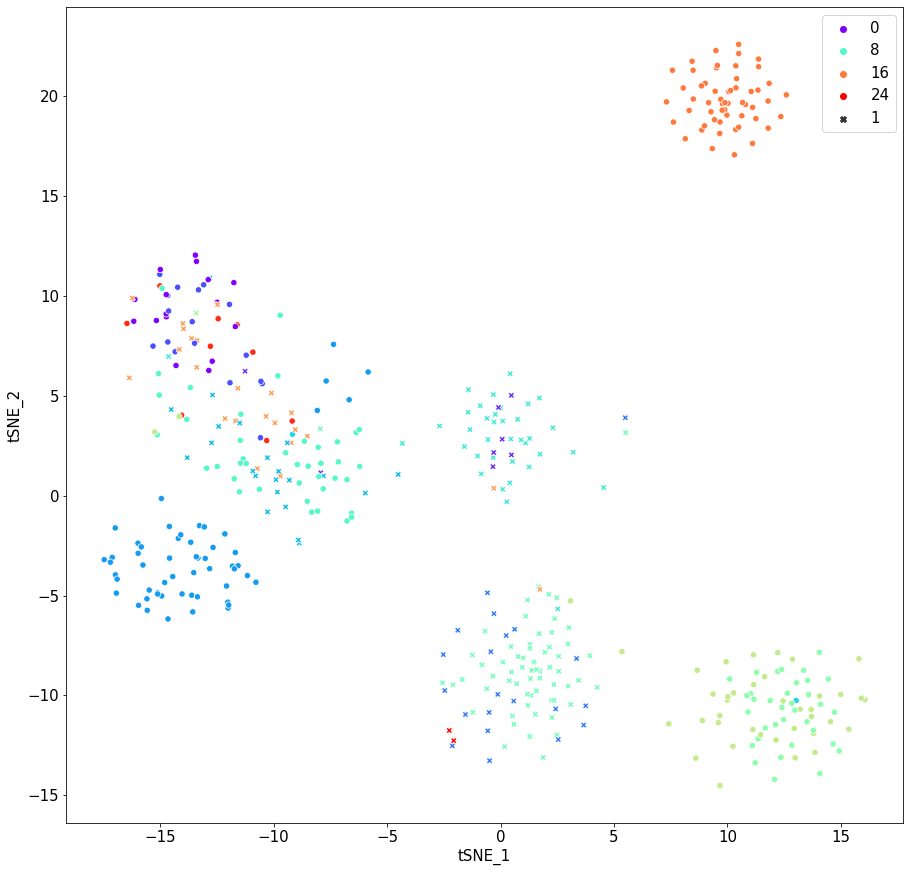

In [683]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(record_dict_all[value]['gamma'],axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

In [ ]:
print('criteria:',value)
print('Q:',record_dict_all[value]['LL'])

print('# marker:',record_dict_all[value]['Y.shape'][1])
print('# marker in original marker:',record_dict_all[value]['Y.shape.intersection'])

print('cluster:',np.unique(plot_value,return_counts=True)[0].tolist())
print('cluster count:',np.unique(plot_value,return_counts=True)[1].tolist())
print('delta log:\n',record_dict_all[value]['model.delta_log'][np.unique(plot_value,return_counts=True)[0]])

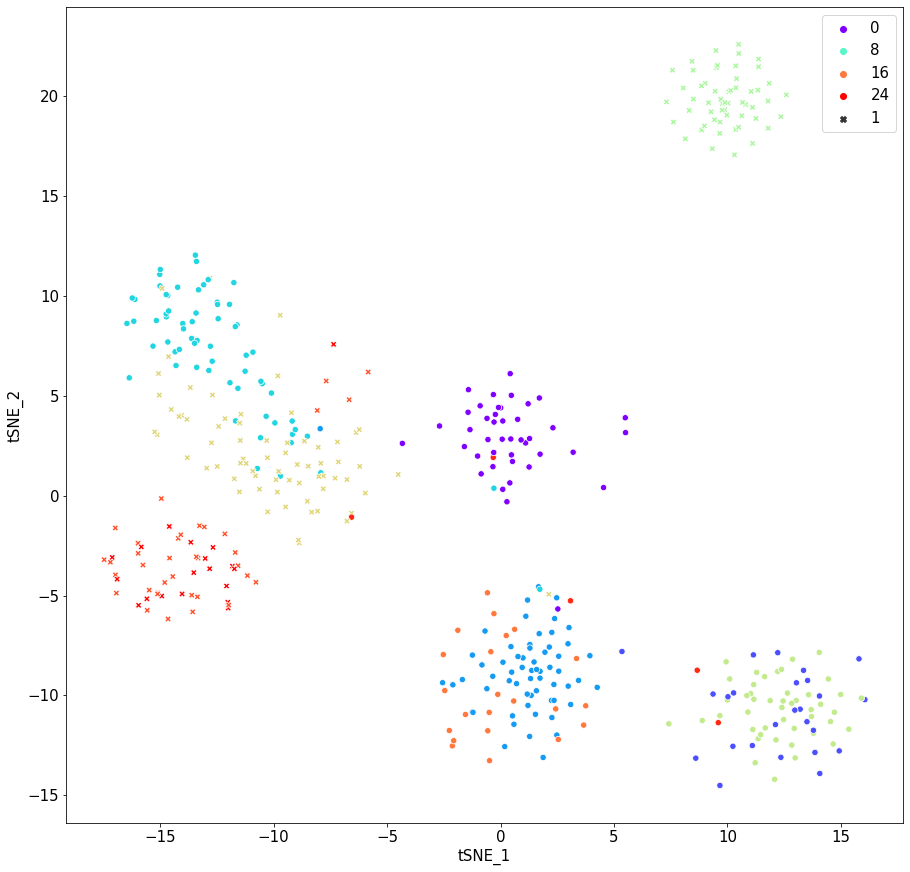

In [574]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(record_dict_all[value]['gamma'],axis=1)
#plot_value[plot_value!=17]=1

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

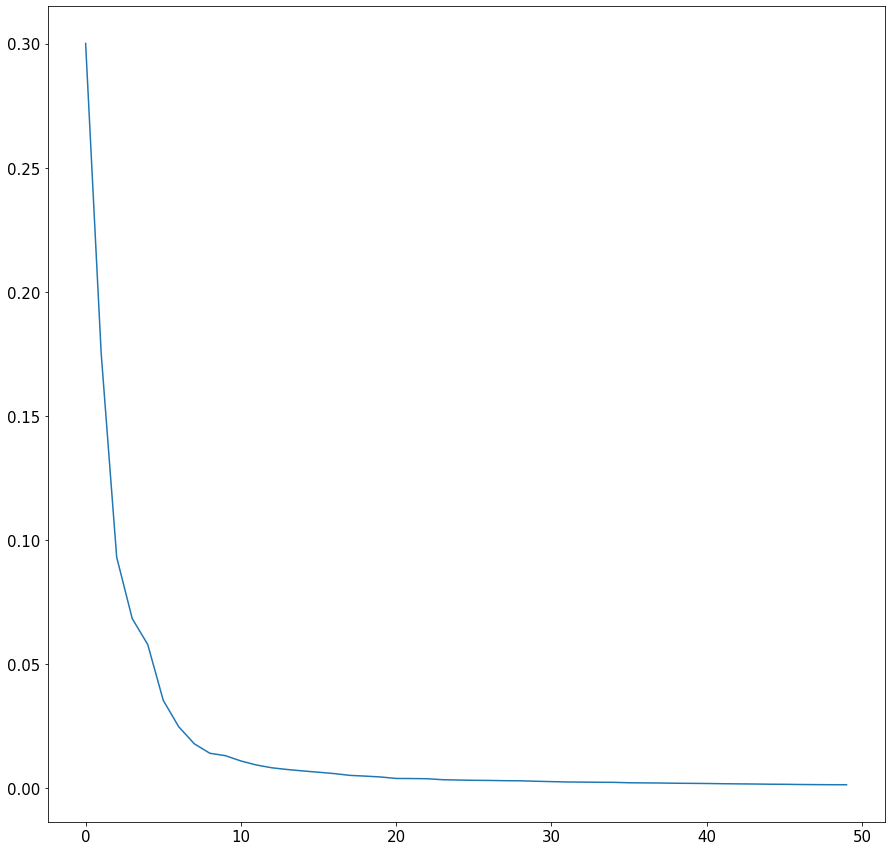

In [685]:

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(exp_data[(LL_all[1]/LL_all[3])>6.5])
plt.plot(pca.explained_variance_ratio_)

In [696]:
marker_corr=pd.DataFrame(exp_data[(LL_all[1]/LL_all[3])>6.5]).T.corr()
edges=marker_corr.mask(np.tril(np.ones(marker_corr.shape)).astype(np.bool)).stack()
edges=pd.DataFrame([[edge[0][0],edge[0][1],edge[1]] for edge in edges.iteritems()],columns=['source','target','rG'])
edges_filtered=edges
edges_filtered=edges_filtered[edges_filtered['rG']>0.3]

In [700]:
groups=[]
for idx,row in edges_filtered.iterrows():
    try:
        group_index=[(row['source'] in groups[i] or row['target'] in groups[i]) for i in range(len(groups))].index(True)
        groups[group_index].add(row['source'])
        groups[group_index].add(row['target'])
    except:
        groups.append({row['source'],row['target']})

In [701]:
groups=sorted(groups,key=lambda x: len(x),reverse=True)

len(groups)

5

In [693]:
edges_filtered['group_id']=[np.argmax([False]+[row['source'] in group for group in groups]) for idx,row in edges_filtered.iterrows()]

import networkx as nx

edges_filtered_filtered=edges_filtered[edges_filtered['group_id']==1]
#edges_filtered_filtered=edges_filtered

G_temp=nx.convert_matrix.from_pandas_edgelist(edges_filtered_filtered,edge_attr=['rG','rG_abs','Z_abs'])

#per_bp_var_temp=per_bp_var.copy()
#per_bp_var_temp.index=per_bp_var_temp.index.map(lambda x:description_to_short(code_to_description(x),'pub',2))
nx.set_node_attributes(G_temp,dict([(node,pd.Series(result_uni['V(G)/Vp-Estimate'].loc[node]).iloc[0]) for node in list(G_temp.nodes)]),'heritability')
#nx.set_node_attributes(G_temp,dict([(node,node) for node in list(G.nodes)]),'label')
In [137]:
#G.edges['triglyceride', 'total_cholesterol']
In [138]:
#G=nx.relabel_nodes(G_temp,lambda x: description_to_short(code_to_description(x),'pub',2))

G=G_temp.copy()#nx.relabel_nodes(G_temp,lambda x:description_to_short(code_to_description(x),'abbr_pub_ori','correlation'))
pos = nx.kamada_kawai_layout(G,weight='Z_abs')


import random

angle_map=lambda x: (np.arctan(x[1]/x[0])+(np.pi if x[0]<0 else 0)+2*np.pi)%(2*np.pi)

def draw_arc(a,b):

    center=(a+b)/2+(1 if random.random()>0.5 else -1)*np.array([(b-a)[1],-(b-a)[0]])*random.uniform(np.sqrt(3)/2,2)

    radius=np.sqrt(np.power(b-center,2).sum())

    a_theta=angle_map(a-center)#arctan_norm((a-center)[1]/(a-center)[0])
    b_theta=angle_map(b-center)
    
    if abs(b_theta-a_theta)>np.pi:
        if a_theta>b_theta:
            a_theta=a_theta-2*np.pi
        else:
            b_theta=b_theta-2*np.pi
            
    try:
        return [center+radius*np.array([np.cos(theta),np.sin(theta)]) for theta in np.arange(min(a_theta,b_theta),max(a_theta,b_theta),abs(b_theta-a_theta)/100)]
    except:
        print('error')
        return [a,b]

#draw_arc(np.array((0,1)),np.array((1,0)))

node_color='heritability'
node_size='heritability'

edge_width='Z_abs'
edge_color='rG'

from matplotlib.collections import LineCollection

plt.rcParams["figure.figsize"] = (15,20)
plt.rcParams["font.size"] = 15


#node initialization
node_df=pd.DataFrame([(pos[node]) for node in G.nodes],index=G.nodes,columns=['x','y'])
for node in G.nodes:
    for idx,value in G.nodes[node].items():
        node_df.loc[node,idx]=value

#edge initialization
edge_df=pd.DataFrame([(pos[edge[0]],pos[edge[1]]) for edge in G.edges],index=G.edges,columns=['source_xy','target_xy'])
for edge in G.edges:
    for idx,value in G.edges[edge].items():
        edge_df.loc[edge,idx]=value

############## Drawing ##############
        
# Draw colorbar
"""
scatter_x=node_df['x']
scatter_y=node_df['y']
scatter_hue=node_df[node_color]
points=plt.scatter(x=scatter_x,y=scatter_y,c=scatter_hue,cmap=plt.cm.PiYG)
        
plt.clf()
"""   

#,[
scatter_x=[i[0] for i in edge_df['source_xy'].values]
scatter_y=[i[1] for i in edge_df['source_xy'].values]
scatter_hue=edge_df[edge_color]
points=plt.scatter(x=scatter_x,y=scatter_y,c=scatter_hue,cmap=plt.cm.PiYG)
        
plt.clf()
  

fig, ax = plt.subplots()

plt.colorbar(points,orientation="horizontal",pad=0.07,shrink=0.3)   

# Draw edges


#line_collection_xy=[[row['source_xy'],(row['source_xy']+row['target_xy'])/2+(0.1,0.1),row['target_xy']] for idx,row in edge_df.iterrows()]
line_collection_xy=[draw_arc(row['source_xy'],row['target_xy']) for idx,row in edge_df.iterrows()]

line_collection_linewidths=np.array([row[edge_width] for idx,row in edge_df.iterrows()])
line_collection_linewidths=(line_collection_linewidths-line_collection_linewidths.min())/(line_collection_linewidths.max()-line_collection_linewidths.min())
line_collection_linewidths=2+3*line_collection_linewidths

line_collection_colors=np.array([plt.cm.PiYG(row[edge_color],alpha=0.7) for idx,row in edge_df.iterrows()])

line_collection=LineCollection(line_collection_xy,zorder=-5,colors=line_collection_colors,linewidths=line_collection_linewidths)
l_c=ax.add_collection(line_collection)

# Draw nodes

scatter_x=node_df['x']
scatter_y=node_df['y']
scatter_hue=node_df[node_color]
#scatter_hue=np.array([plt.cm.rainbow(row[node_color],alpha=0.7) for idx,row in node_df.iterrows()])
#
scatter_size=np.exp(node_df[node_size])
sns.scatterplot(x=scatter_x,y=scatter_y,hue=scatter_hue,palette=plt.cm.rainbow,vmin=-1,alpha=0.7,size=scatter_size,sizes=(100,1000),legend=None)#,color='white')#,edgecolor='black')


############## Annotation ##############

AttributeError: module 'networkx' has no attribute 'from_pandas_dataframe'

In [702]:
sns.heatmap(data =pd.DataFrame(exp_data[(LL_all[1]/LL_all[3])>6.5]).T.corr())

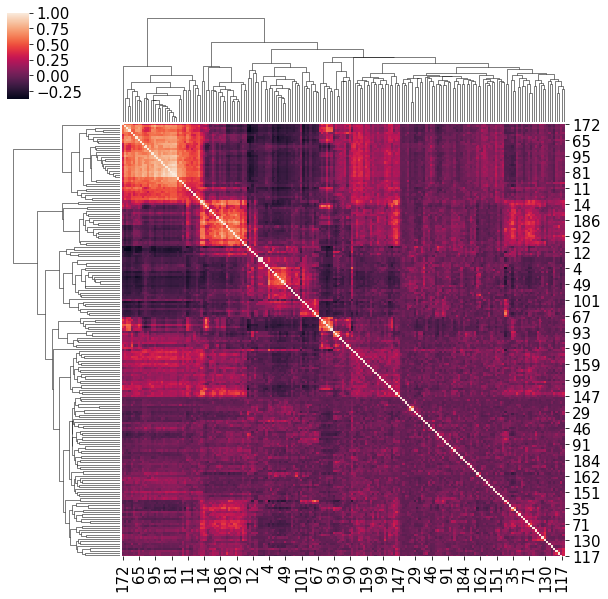

In [708]:
#pd.DataFrame(exp_data[(LL_all[1]/LL_all[3])>6.5]).T.corr().hist()
#plt.show()
#sns.clustermap(exp_data[(LL_all[1]/LL_all[3])>6.5].T.corr())
sns.clustermap(pd.DataFrame(exp_data[(LL_all[1]/LL_all[3])>6.5]).T.corr())

In [709]:
pd.DataFrame(exp_data[(LL_all[1]/LL_all[3])>6.5]).T.corr()

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,1.000000,0.283332,-0.082947,-0.088395,0.178356,0.154238,0.424021,-0.084342,0.045019,-0.341610,...,-0.036856,0.019391,-0.008665,-0.011627,0.034277,-0.173330,0.178949,0.127925,0.336626,0.058283
1,0.283332,1.000000,0.312240,0.283656,0.540272,-0.224776,0.280409,0.356276,0.128455,0.005073,...,0.071913,0.083390,0.174526,0.128570,0.134633,0.065022,0.122806,0.056718,0.069772,0.074298
2,-0.082947,0.312240,1.000000,0.454179,-0.096346,0.315293,0.088046,0.255984,0.609233,0.223868,...,0.064800,0.098532,0.209146,0.080452,0.157455,0.547245,0.025989,-0.031287,-0.012121,0.042474
3,-0.088395,0.283656,0.454179,1.000000,-0.050247,-0.055438,-0.021071,0.211544,0.208309,0.230496,...,0.079669,0.015269,0.098248,0.173101,0.121562,0.268232,-0.063879,0.014350,-0.030984,-0.037153
4,0.178356,0.540272,-0.096346,-0.050247,1.000000,-0.312897,0.141304,0.076579,-0.144598,-0.141395,...,0.127399,-0.024602,0.015134,0.029984,-0.049555,-0.120919,0.130899,0.043505,0.044378,0.117748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,-0.173330,0.065022,0.547245,0.268232,-0.120919,0.180435,0.095988,-0.030573,0.566252,0.000493,...,0.037284,0.028449,0.107466,0.054649,0.053740,1.000000,0.011322,-0.044555,-0.066559,0.027899
187,0.178949,0.122806,0.025989,-0.063879,0.130899,0.008634,0.068385,0.040518,0.022920,-0.015008,...,-0.057674,0.000119,-0.004398,0.063849,-0.065032,0.011322,1.000000,-0.003582,-0.008726,-0.001562
188,0.127925,0.056718,-0.031287,0.014350,0.043505,-0.036338,-0.001182,0.014115,-0.010368,-0.035082,...,-0.041728,-0.019803,0.071879,-0.035906,-0.029209,-0.044555,-0.003582,1.000000,0.005408,0.002694
189,0.336626,0.069772,-0.012121,-0.030984,0.044378,0.075193,0.021452,0.000209,-0.004621,-0.146469,...,-0.061318,-0.019971,-0.044737,0.005180,-0.038086,-0.066559,-0.008726,0.005408,1.000000,0.154539


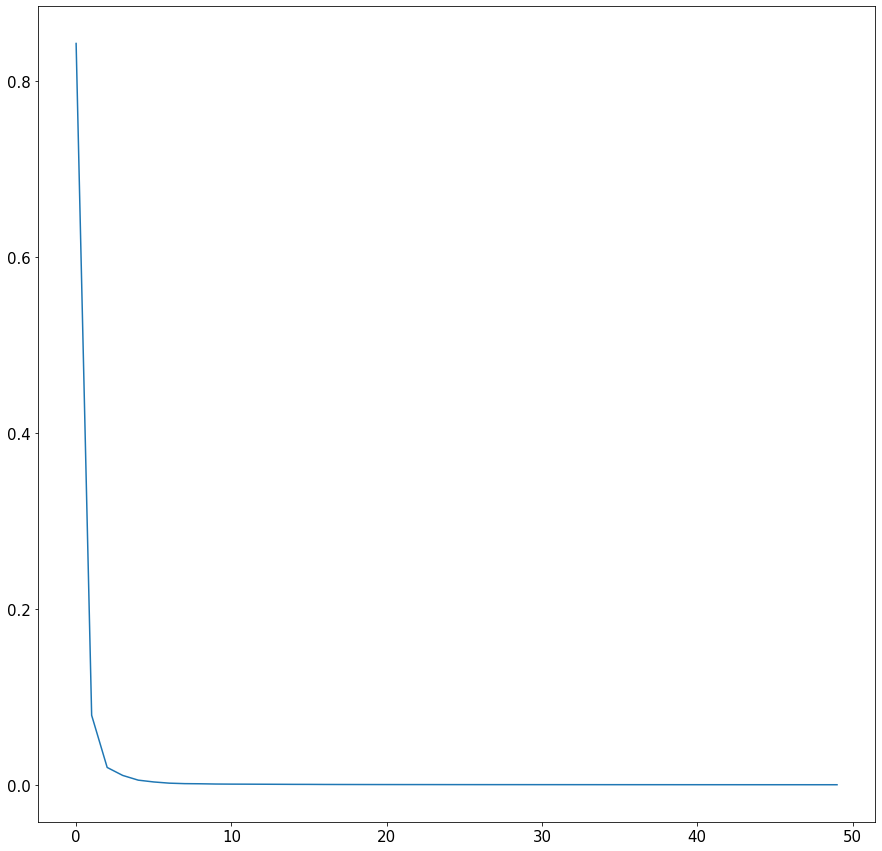

In [687]:

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(exp_data[:])
plt.plot(pca.explained_variance_ratio_)

In [561]:
#M_true.shape,
from scipy.stats import pearsonr
M_true=np.array([np.mean(exp_data[(LL_all[1]/LL_all[3])>value,:][:,exp_data_meta_clusterid_clusteridunique==i],axis=1) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])
M_get=np.array([np.mean(exp_data[(LL_all[1]/LL_all[3])>value,:][:,np.argmax(gamma_get,axis=1)==i],axis=1) for i in sorted(np.arange(gamma_get.shape[1]))])
M_get=np.nan_to_num(M_get,nan=0)
type_mapping=[np.argmin([pearsonr(M_get[i],M_true[j])[1] for j in range(M_true.shape[0])]) for i in range(M_get.shape[0])]
sum(pd.Series(type_mapping)[np.argmax(gamma_get,axis=1)].values==exp_data_meta_clusterid_clusteridunique.values)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


437

In [577]:
gamma_get[plot_value==19]
#plot_value

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.

In [ ]:
plot_value[plot_value!=2]=1
plot_value[plot_value!=12]=1

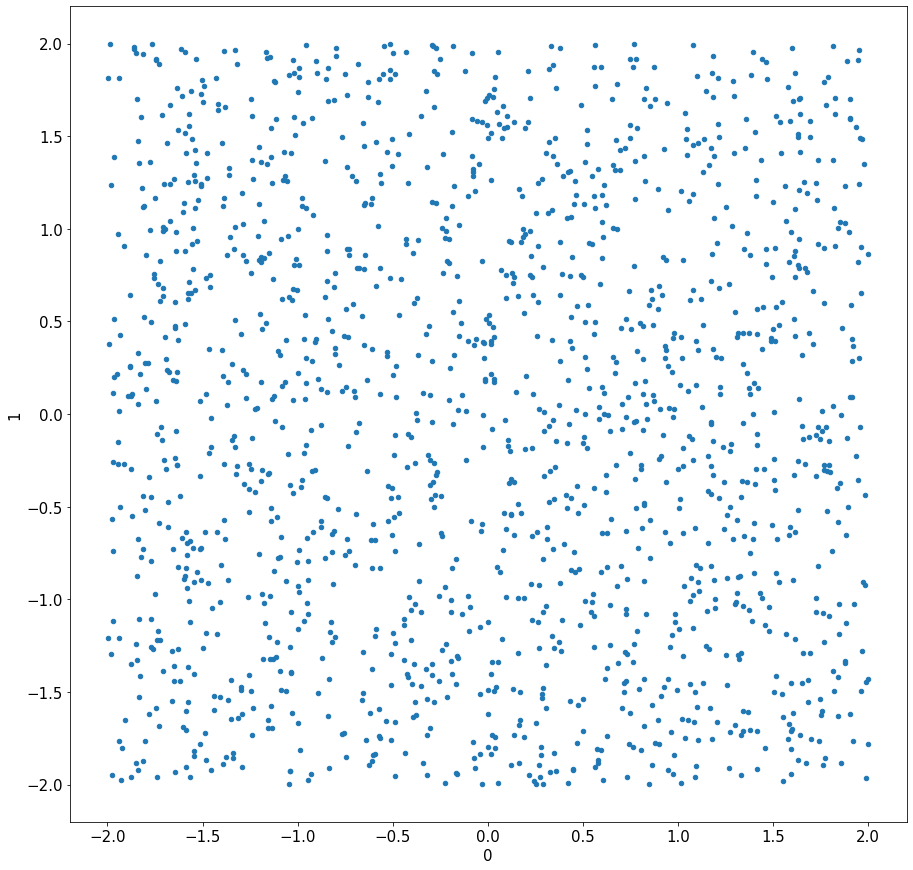

In [593]:
 pd.DataFrame([record_dict_all[value]['model.delta_log'][2],record_dict_all[value]['model.delta_log'][12]],index=None).T.plot.scatter(x=0,y=1)

In [532]:
 pd.DataFrame([record_dict_all[value]['model.delta_log'][2],record_dict_all[value]['model.delta_log'][12]],index=None)

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,-1.124265,0.326957,1.181511,0.379776,0.718364,1.346184,1.391912,1.004788,1.403402,0.949972,...,1.069252,1.304427,1.104397,0.799441,0.757644,1.491893,1.085419,0.452994,0.696502,1.069481
1,-0.893538,0.195457,1.216994,1.022972,0.577173,1.316757,1.332053,1.050501,1.394278,0.922871,...,1.070314,1.444734,1.185762,1.015176,1.258328,1.527667,0.986901,0.545525,0.744815,1.000580


In [ ]:
device=device_cuda_list[2]
model=Custom_Model_Trick_Hard(Y,rho.values,X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)

In [728]:
Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'LL')

tensor(-1576.2403, device='cuda:2', grad_fn=<Poisson_FunctionBackward>)

(array([ 9, 13]), array([297, 149])) Parameter containing:
tensor([[-1.1450],
        [-1.8888],
        [-1.3649],
        [-0.2080],
        [-1.7489],
        [ 0.8403],
        [ 0.2723],
        [-1.9054],
        [-1.7041],
        [ 2.1738],
        [ 0.2088],
        [ 1.0899],
        [-0.9281],
        [ 2.2944],
        [-1.1411],
        [-0.9015],
        [ 0.8477],
        [ 0.5797],
        [ 1.1159],
        [-0.8966]], device='cuda:2', requires_grad=True)


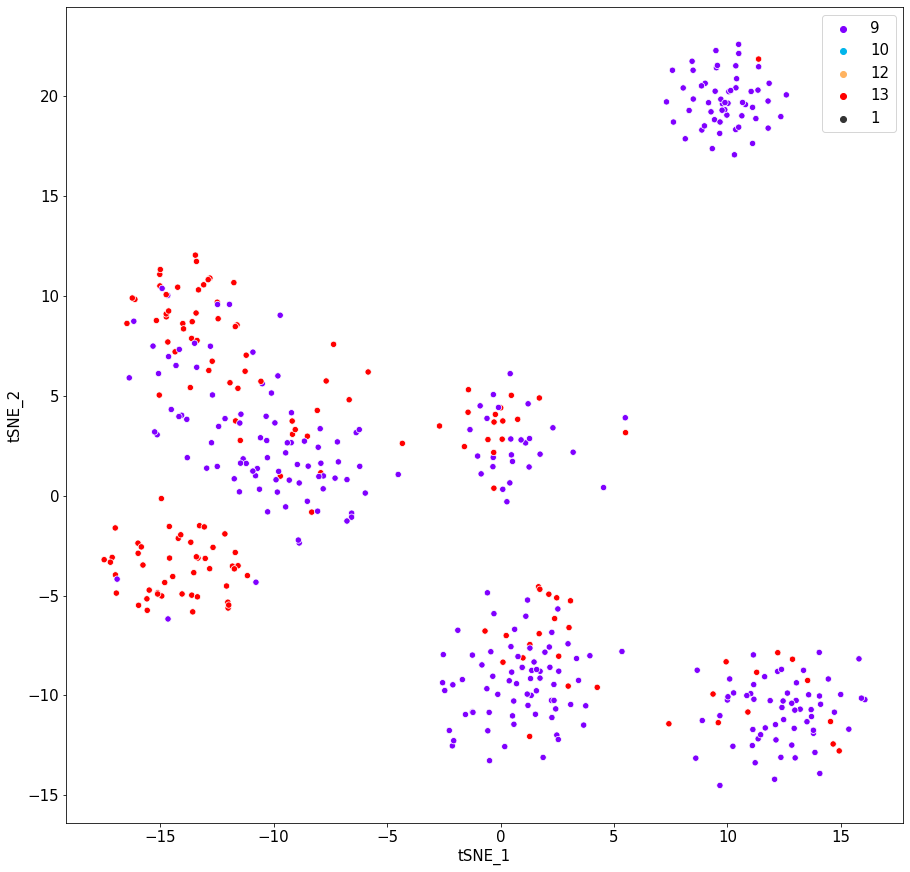

In [721]:
import seaborn as sns

with torch.no_grad():
    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)    
    gamma_get=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(gamma_get.cpu().numpy(),axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

print(np.unique(plot_value,return_counts=True),model.delta_log)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([21, 37, 18, 33, 20, 20, 37, 28, 21,  7, 18, 28, 28, 21, 16, 26, 16,
       23, 19,  9])) Parameter containing:
tensor([[ 1.7399],
        [-2.8928],
        [ 1.3270],
        [-0.1663],
        [ 1.9632],
        [-2.6042],
        [ 0.3164],
        [ 0.6748],
        [ 1.9288],
        [ 0.3009],
        [ 1.0851],
        [ 0.6748],
        [ 1.6639],
        [ 1.4676],
        [ 1.8947],
        [ 1.5771],
        [ 1.8394],
        [ 0.2042],
        [-0.1663],
        [ 2.0106]], device='cuda:2', requires_grad=True)


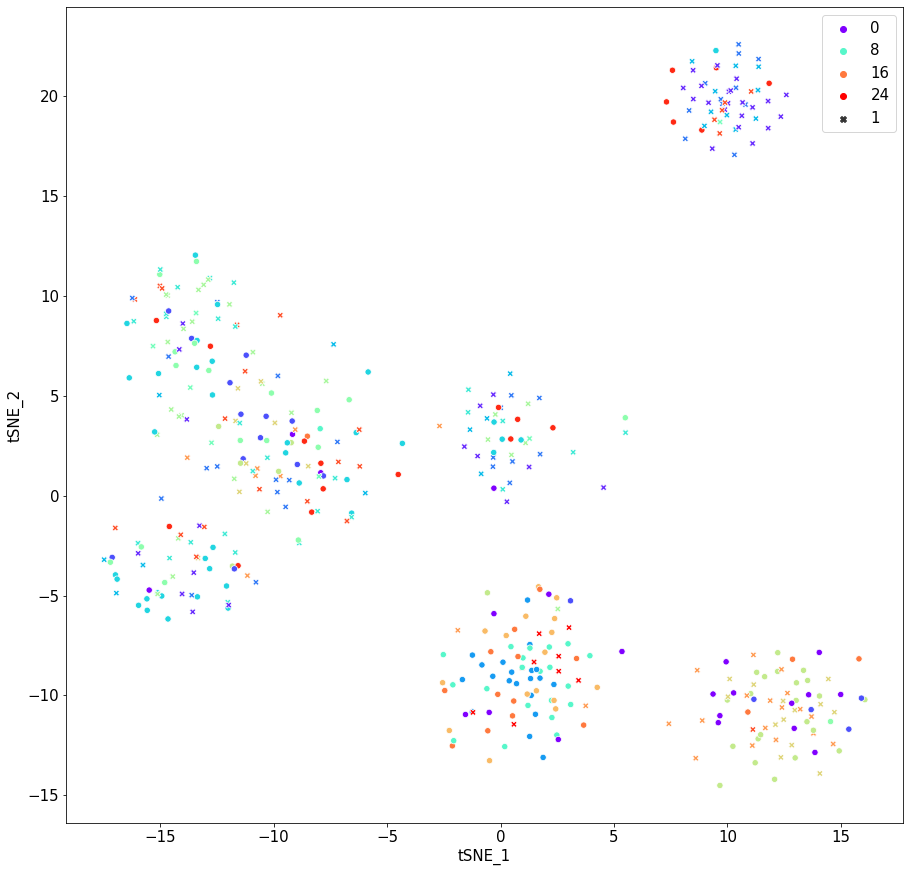

In [735]:
import seaborn as sns

with torch.no_grad():
    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)    
    gamma_get=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(gamma_get.cpu().numpy(),axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

print(np.unique(plot_value,return_counts=True),model.delta_log)

In [37]:
device=device_cuda_list[3]#

In [38]:
LL_list_list=[]
for c in [1,3,5,8,10,20,30,40,50]:
    print(c)
    LL_list=[]
    for iter_idx,exp_data_idx in enumerate(np.arange(exp_data.shape[0])):
        if iter_idx%10==0:
            print(iter_idx)
        Y=exp_data[exp_data_idx:exp_data_idx+1].transpose().astype(float)

        cell_dataset=Cell_Dataset(Y,X,s)
        cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)    

        if iter_idx==0:
            model=Custom_Model_Trick_Hard(Y,np.ones((c,1)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
        else:
            model.init_parameter(Y=Y,delta_min=0)
        optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))
        #LL=run_EM_trick(model,optimizer,LL_diff_tolerance=LL_diff_tolerance,Q_diff_tolerance=Q_diff_tolerance)[1].detach().cpu().numpy()
        LL=run_EM_trick(model,optimizer,LL_diff_tolerance=LL_diff_tolerance,Q_diff_tolerance=Q_diff_tolerance,verbose=False)[1].detach().cpu().numpy()
        LL_list.append(LL)
    LL_list_list.append(LL_list)

1
0


/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


10


KeyboardInterrupt: 

In [39]:
LL_list

[array(7068574.65970719),
 array(1828538.44831255),
 array(3081803.47711565),
 array(3059501.7324794),
 array(3401045.90939888),
 array(1327806.80500482),
 array(430565.53151451),
 array(947057.38097024),
 array(779609.37994887),
 array(199645.74016024),
 array(184756.94636586),
 array(275137.43438918)]

In [42]:
LL_all=pd.concat([pd.read_csv('LL_{}.csv'.format(c),index_col=0,header=None) for c in [1,2,3,5,8,10,20,30,40,50]],axis=1)#[pd.read_csv('LL_{}.csv'.format(c),index_col=0,header=None) for c in [1,3,5,8,10,20]
LL_all.columns=[1,2,3,5,8,10,20,30,40,50]

In [43]:
LL_dup_all=pd.concat([pd.read_csv('LL_dup_{}.csv'.format(c),index_col=0,header=None) for c in [1,2]],axis=1)#[pd.read_csv('LL_{}.csv'.format(c),index_col=0,header=None) for c in [1,3,5,8,10,20]
LL_dup_all.columns=[1,2]

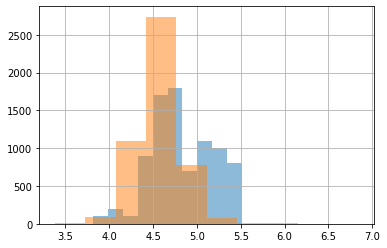

In [48]:
marker_unique_exp_data_idx_bool=np.array([i in marker_unique_exp_data_idx for i in range(exp_data.shape[0])])
np.log10(LL_all[1]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_all[1]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)
#LL_all[1]
#len(marker_unique_exp_data_idx_bool)

In [61]:
marker_unique_exp_data_idx_bool=np.array([i in marker_unique_exp_data_idx for i in range(exp_data.shape[0])])
np.log10(LL_all[3]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_all[3]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)
#LL_all[1]
#len(marker_unique_exp_data_idx_bool)

0
0       0.305550
1       1.000008
2       0.345078
3       1.000000
4       0.296847
          ...   
4893    0.291523
4894    0.298184
4895    0.371831
4896    0.416547
4897    0.387137
Length: 4898, dtype: float64

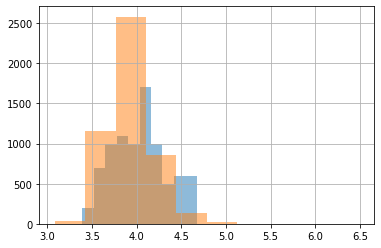

In [277]:
marker_unique_exp_data_idx_bool=np.array([i in marker_unique_exp_data_idx for i in range(exp_data.shape[0])])
np.log10(LL_all[3]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_all[3]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)
#LL_all[1]
#len(marker_unique_exp_data_idx_bool)

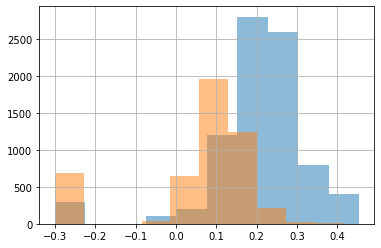

In [69]:
np.log10(LL_all[1]/LL_all[2]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_all[1]/LL_all[2]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

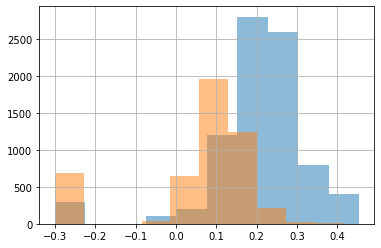

In [83]:
np.log10(LL_all[1]/LL_all[2]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_all[1]/LL_all[2]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

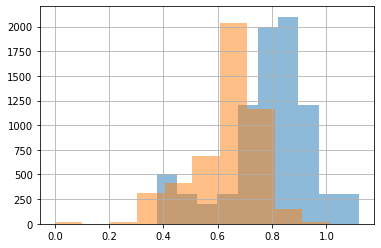

In [70]:
np.log10(LL_all[1]/LL_all[3]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_all[1]/LL_all[3]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

In [82]:
#roc_curve?

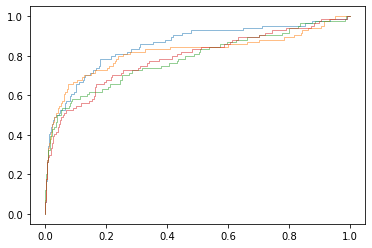

In [87]:
fpr,tpr,_=roc_curve(marker_unique_exp_data_idx_bool, LL_all[1]/LL_all[2])
plt.plot(fpr,tpr,linewidth=0.5)
fpr,tpr,_=roc_curve(marker_unique_exp_data_idx_bool, LL_all[1]/LL_all[3])
plt.plot(fpr,tpr,linewidth=0.5)
fpr,tpr,_=roc_curve(marker_unique_exp_data_idx_bool, LL_all[1]/LL_all[5])
plt.plot(fpr,tpr,linewidth=0.5)
fpr,tpr,_=roc_curve(marker_unique_exp_data_idx_bool, LL_all[1]/LL_all[10])
plt.plot(fpr,tpr,linewidth=0.5)

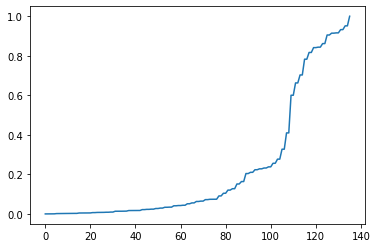

In [76]:
plt.plot(fpr)

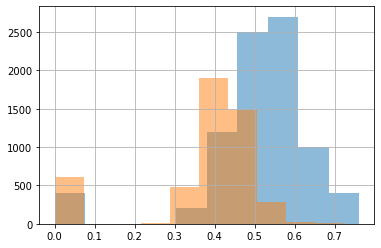

In [65]:
np.log10(LL_dup_all[1]/LL_dup_all[2]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_dup_all[1]/LL_dup_all[2]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


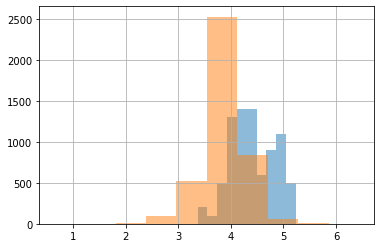

In [66]:
np.log10(LL_all[1]-LL_all[2]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_all[1]-LL_all[2]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

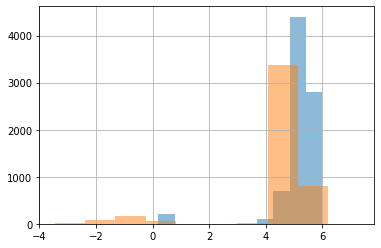

In [67]:
np.log10(LL_dup_all[1]-LL_dup_all[2]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_dup_all[1]-LL_dup_all[2]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

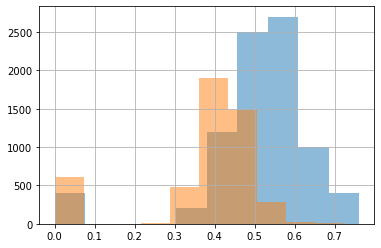

In [63]:
np.log10(LL_dup_all[1]/LL_dup_all[2]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_dup_all[1]/LL_dup_all[2]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


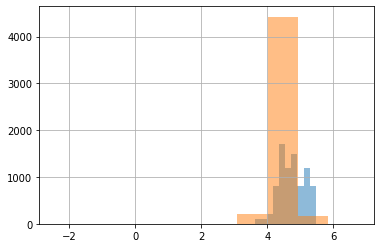

In [57]:
np.log10(LL_all[1]-LL_all[3]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_all[1]-LL_all[3]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

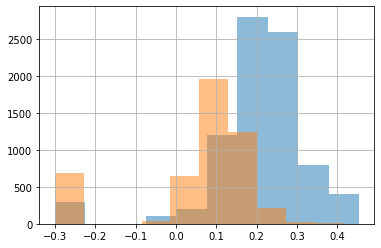

In [58]:
np.log10(LL_all[1]/LL_all[2]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_all[1]/LL_all[2]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

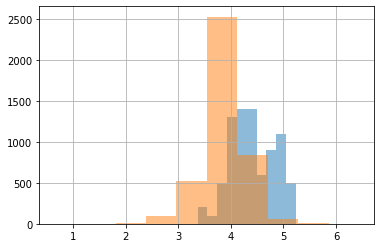

In [59]:
np.log10(LL_all[1]-LL_all[2]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(LL_all[1]-LL_all[2]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

In [724]:
#np.log10(LL_all[1]-LL_all[3]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
#np.log10(LL_all[1]-LL_all[3]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)
(LL_all[1]/LL_all[3]).sort_values()

0
3        0.999995
17       0.999997
13       0.999998
72       0.999998
45       0.999999
          ...    
1862    10.700215
4361    10.813986
2786    12.421877
3658    12.971909
3834    13.193015
Length: 4898, dtype: float64

In [28]:
(LL_all[1]/LL_all[3]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
(LL_all[1]/LL_all[3]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

NameError: name 'marker_unique_exp_data_idx_bool' is not defined

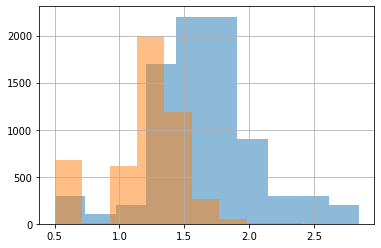

In [51]:
(LL_all[1]/LL_all[2]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
(LL_all[1]/LL_all[2]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

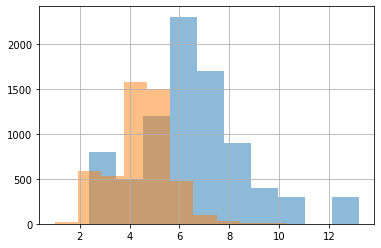

In [52]:
(LL_all[1]/LL_all[3]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
(LL_all[1]/LL_all[3]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

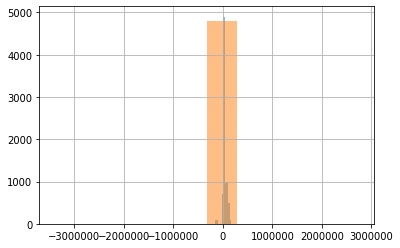

In [54]:
(LL_all[1]-LL_all[2]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
(LL_all[1]-LL_all[2]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

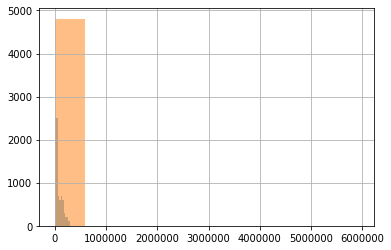

In [55]:
(LL_all[1]-LL_all[3]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
(LL_all[1]-LL_all[3]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

In [5]:
(LL_all[1]/LL_all[3]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
(LL_all[1]/LL_all[3]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

NameError: name 'marker_unique_exp_data_idx_bool' is not defined

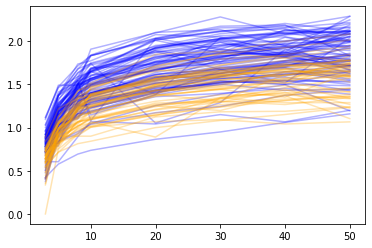

In [234]:
plt.plot(np.log10(1/LL_all.iloc[:,1:].T*LL_all[1].values).T.iloc[marker_unique_exp_data_idx_bool].T,color='blue',alpha=0.3)
plt.plot(np.log10(1/LL_all.iloc[:,1:].T*LL_all[1].values).T.iloc[~marker_unique_exp_data_idx_bool].sample(50).T,color='orange',alpha=0.3)
plt.show()

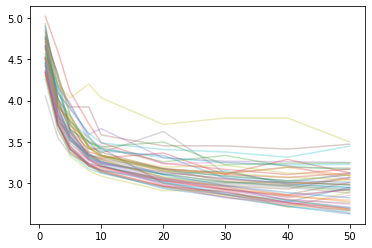

In [217]:
plt.plot(np.log10(LL_all).iloc[~marker_unique_exp_data_idx_bool].sample(50).T,alpha=0.3)
#plt.plot(np.log10(LL_all).iloc[~marker_unique_exp_data_idx_bool].sample(50).T,color='orange',alpha=0.3)
plt.show()

In [274]:
false_LL_all=pd.concat([pd.read_csv('false_LL_{}.csv'.format(c),index_col=0,header=None) for c in [1,3,5,8,10,20,40,50]],axis=1)#[pd.read_csv('LL_{}.csv'.format(c),index_col=0,header=None) for c in [1,3,5,8,10,20]
false_LL_all.columns=[1,3,5,8,10,20,40,50]

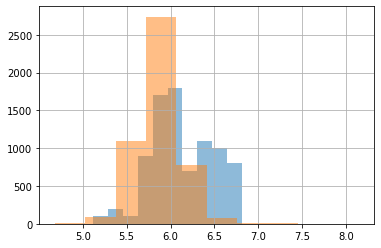

In [275]:
marker_unique_exp_data_idx_bool=np.array([i in marker_unique_exp_data_idx for i in range(exp_data.shape[0])])
np.log10(false_LL_all[20]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(false_LL_all[20]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)
#LL_all[1]
#len(marker_unique_exp_data_idx_bool)

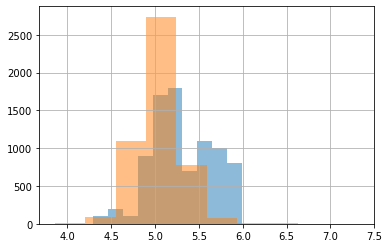

In [276]:
marker_unique_exp_data_idx_bool=np.array([i in marker_unique_exp_data_idx for i in range(exp_data.shape[0])])
np.log10(false_LL_all[3]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(false_LL_all[3]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)
#LL_all[1]
#len(marker_unique_exp_data_idx_bool)

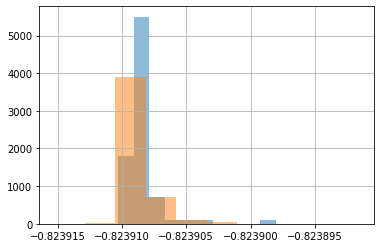

In [250]:
np.log10(false_LL_all[3]/false_LL_all[20]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(false_LL_all[3]/false_LL_all[20]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

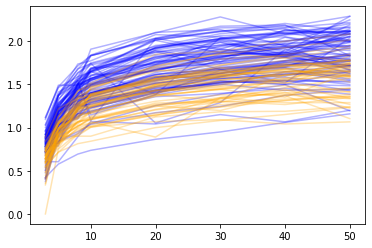

In [234]:
plt.plot(np.log10(1/LL_all.iloc[:,1:].T*LL_all[1].values).T.iloc[marker_unique_exp_data_idx_bool].T,color='blue',alpha=0.3)
plt.plot(np.log10(1/LL_all.iloc[:,1:].T*LL_all[1].values).T.iloc[~marker_unique_exp_data_idx_bool].sample(50).T,color='orange',alpha=0.3)
plt.show()

In [255]:
hell=pd.read_csv('hell_LL_10_10.csv',index_col=0,header=None)

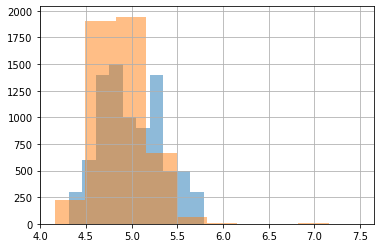

In [257]:
marker_unique_exp_data_idx_bool=np.array([i in marker_unique_exp_data_idx for i in range(exp_data.shape[0])])
np.log10(hell[1]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(hell[1]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)
#LL_all[1]
#len(marker_unique_exp_data_idx_bool)

In [ ]:
np.log10(false_LL_all[3]/false_LL_all[20]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
np.log10(false_LL_all[3]/false_LL_all[20]).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, plot_roc_curve

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, plot_roc_curve
for i in [1,2,3,5,8,10,20,40,50]:
    print('{:02d}  {:.4f}  {:.4f}  {:.4f}  {:.4f}  {:.4f} - {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(
          i,
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[1]/LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[2]/LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[3]/LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[5]/LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[8]/LL_all[i]),
        
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[1]-LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[2]-LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[3]-LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[5]-LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[8]-LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[10]-LL_all[i]),        
         )
         )
    

01  0.7236  0.5000  0.1453  0.1814  0.2149 - 0.1921 0.5000 0.1683 0.2570 0.2678
02  0.5984  0.8547  0.5000  0.3827  0.4184 - 0.3993 0.8317 0.5000 0.4022 0.3995
03  0.6083  0.8186  0.6173  0.5000  0.4289 - 0.4150 0.7430 0.5978 0.5000 0.4072
05  0.5985  0.7851  0.5816  0.5711  0.5000 - 0.4384 0.7322 0.6005 0.5928 0.5000
08  0.5890  0.8079  0.6007  0.5850  0.5616 - 0.5000 0.7279 0.5998 0.6119 0.5911
10  0.5654  0.7904  0.6112  0.6206  0.6053 - 0.5954 0.7274 0.6003 0.6149 0.5930
20  0.5458  0.7731  0.6186  0.6329  0.6269 - 0.6274 0.7265 0.5991 0.6050 0.5929
40  0.5072  0.8079  0.6546  0.6689  0.6432 - 0.6553 0.7267 0.6007 0.6189 0.6219
50  0.5174  0.7762  0.6308  0.6422  0.6221 - 0.6095 0.7260 0.5999 0.6159 0.6122


In [37]:
for i in [1,3,5,8,10,20,40,50]:
    print('{:02d}  {:.4f}  {:.4f}  {:.4f}  {:.4f}  {:.4f} - {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(
          i,
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, np.exp(LL_all[1])/np.exp(LL_all[i])),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[3]/LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[5]/LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[8]/LL_all[i]),
        
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[1]-LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[3]-LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[5]-LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[8]-LL_all[i]),
          roc_auc_score(marker_unique_exp_data_idx_bool, LL_all[10]-LL_all[i]),        
         )
         )
    

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
roc_curve(y_test.ravel(), y_score.ravel())

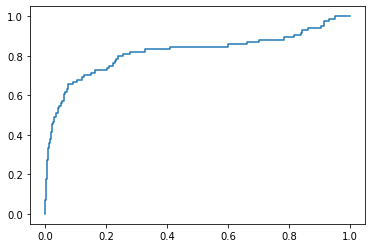

In [304]:
fpr,tpr,_=roc_curve(marker_unique_exp_data_idx_bool, LL_all[1]/LL_all[3])
plt.plot(fpr,tpr)

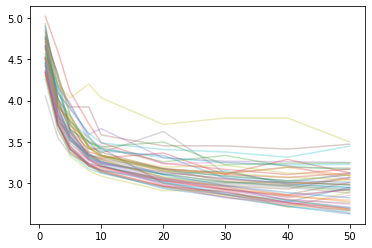

In [217]:
plt.plot(np.log10(LL_all).iloc[~marker_unique_exp_data_idx_bool].sample(50).T,alpha=0.3)
#plt.plot(np.log10(LL_all).iloc[~marker_unique_exp_data_idx_bool].sample(50).T,color='orange',alpha=0.3)
plt.show()

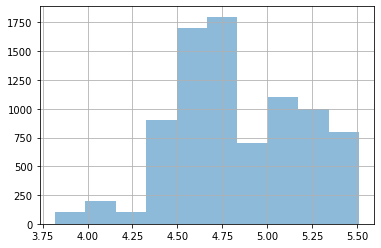

In [155]:
np.log10(LL_all[8]).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)

(array([ 2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 14]), array([ 9, 55,  5, 74, 83, 50, 55,  2, 51, 20, 42])) Parameter containing:
tensor([[ 1.2328,  0.4179,  1.1874,  ..., -0.4976,  0.5704,  2.5101],
        [-0.7496, -1.1168,  0.4719,  ...,  1.6721, -0.6909, -0.8269],
        [ 1.2309,  1.1542, -0.1984,  ...,  0.9859,  1.4348,  0.2735],
        ...,
        [ 1.1024,  1.5396,  1.2910,  ...,  1.4483,  1.1090,  1.1940],
        [ 0.0211,  1.1051,  0.7477,  ...,  1.7025,  1.4237, -0.0129],
        [ 0.7249,  0.9815,  1.7455,  ...,  1.3752,  1.5639,  1.3511]],
       device='cuda:2', requires_grad=True)


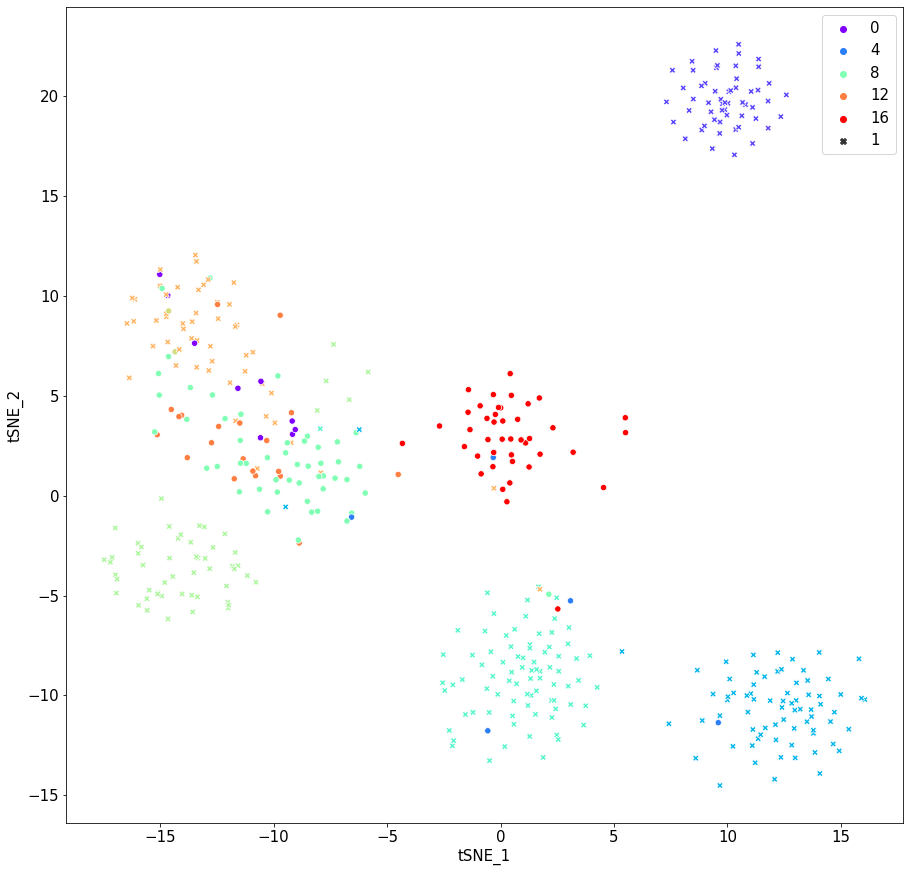

In [722]:
import seaborn as sns

with torch.no_grad():
    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)    
    gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(gamma_new.cpu().numpy(),axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

print(np.unique(plot_value,return_counts=True),model.delta_log)

In [52]:
np.sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique)

437

SRR3952323    0
SRR3952325    0
SRR3952326    0
SRR3952327    0
SRR3952328    0
             ..
SRR3952828    7
SRR3952829    7
SRR3952830    7
SRR3952831    7
SRR3952832    7
Name: celltype, Length: 446, dtype: int64